In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,6


In [169]:
Jobseekers = pd.read_csv('20180517_jobseekers.csv')
Jobseekers.head()

,State,Country,DOB,Sex,MaritalStatus,RegDate,advertmeans,yr_exp,no,Experience,Specialization,Courselevel
0,Abia State,Nigeria,30.0,Female,Single,2011-12-12 00:00:00,NaN,0,3704,0,Bsc,NaN
1,Kaduna,Nigeria,39.0,Male,Single,2011-12-12 00:00:00,NaN,0,3015,0,Bsc,NaN
2,rivers state,Nigeria,30.0,Male,Single,2011-12-12 00:00:00,NaN,0,4540,0,Bsc,NaN
3,RIVERS STATE,Nigeria,39.0,Female,Single,2011-12-12 00:00:00,NaN,0,2551,0,Hospitality,Bsc
4,Kaduna,Nigeria,32.0,Male,Single,2011-12-12 00:00:00,NaN,0,2600,1,Hospitality,Bsc


In [170]:
Jobseekers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 12 columns):
State             4585 non-null object
Country           4726 non-null object
DOB               3950 non-null float64
Sex               4631 non-null object
MaritalStatus     887 non-null object
RegDate           6069 non-null object
advertmeans       3265 non-null object
yr_exp            6069 non-null int64
no                6069 non-null int64
Experience        6069 non-null int64
Specialization    5960 non-null object
Courselevel       6066 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 569.0+ KB


In [171]:
#Change DOB to Age
Jobseekers.columns = ['State', 'Country', 'Age', 'Sex', 'MaritalStatus', 'RegDate',
       'advertmeans', 'yr_exp', 'no', 'Experience', 'Specialization',
       'Courselevel']

In [172]:
Jobseekers = Jobseekers[(Jobseekers.Age.notnull()) & (Jobseekers['Age'] < 80) & (Jobseekers['Age'] > 20)]
Jobseekers = Jobseekers[(Jobseekers.Experience.notnull()) & (Jobseekers['Experience'] < 40) & (Jobseekers['Experience'] > 0)]
Jobseekers = Jobseekers[(Jobseekers.Sex.notnull())]
Jobseekers = Jobseekers[(Jobseekers.MaritalStatus.notnull())]
Jobseekers = Jobseekers[Jobseekers['Sex'] != '1']
Jobseekers = Jobseekers[Jobseekers['Country'] == 'Nigeria']
Jobseekers.Sex = Jobseekers['Sex'].astype('category')
Jobseekers.advertmeans = Jobseekers['advertmeans'].astype('category')
Jobseekers.MaritalStatus = Jobseekers['MaritalStatus'].astype('category')
Jobseekers['RegDate'] = Jobseekers['RegDate'].astype('datetime64[ns]')

In [173]:
Jobseekers.describe()

,Age,yr_exp,no,Experience
count,224.000000,224.0,224.000000,224.000000
mean,34.156250,0.0,3244.214286,3.714286
std,4.609179,0.0,1885.086764,3.545802
min,24.000000,0.0,188.000000,1.000000
25%,31.000000,0.0,1623.000000,1.000000
50%,33.000000,0.0,3089.500000,3.000000
75%,37.000000,0.0,4985.250000,4.250000
max,49.000000,0.0,6221.000000,21.000000


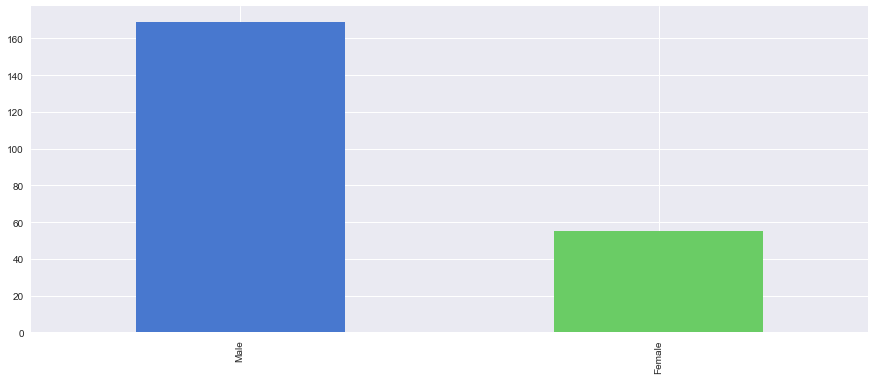

In [208]:
Jobseekers['Sex'].value_counts().plot(kind="bar")

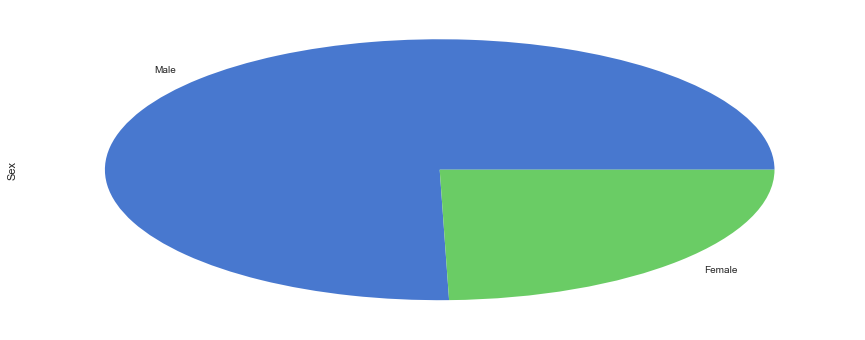

In [209]:
Jobseekers['Sex'].value_counts().plot(kind="pie")

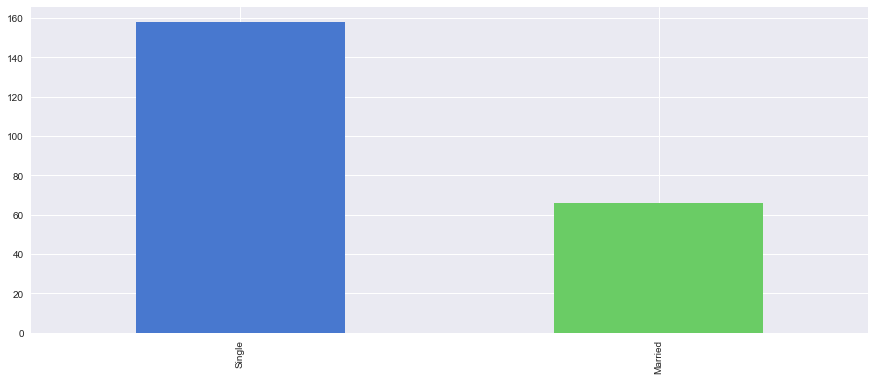

In [210]:
Jobseekers['MaritalStatus'].value_counts().plot(kind="bar")

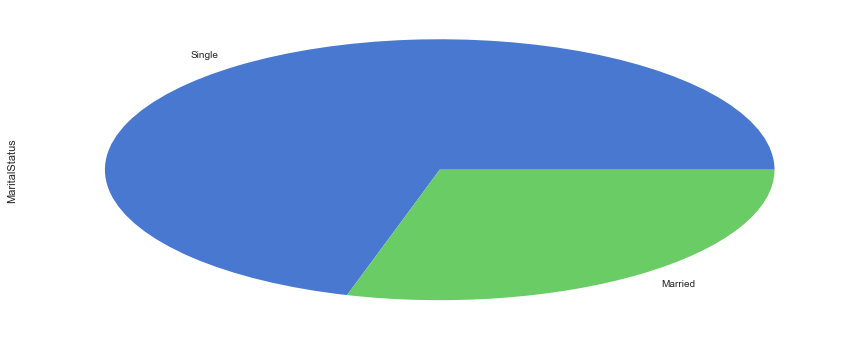

In [211]:
Jobseekers['MaritalStatus'].value_counts().plot(kind="pie")

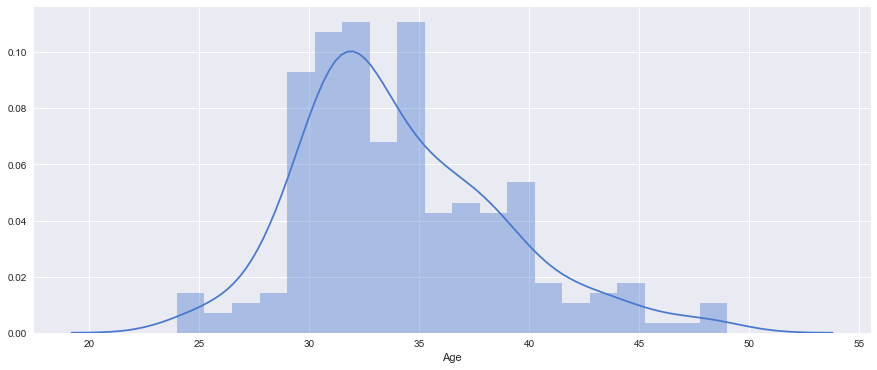

In [174]:
vis1 = sns.distplot(Jobseekers['Age'], bins=20)

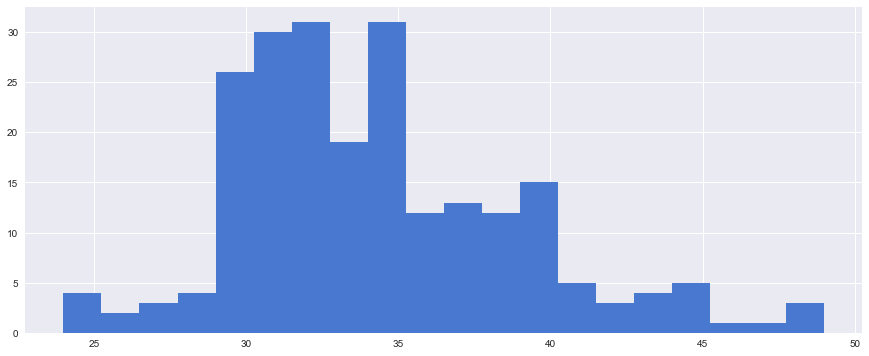

In [175]:
n1 = plt.hist(Jobseekers['Age'], bins=20)

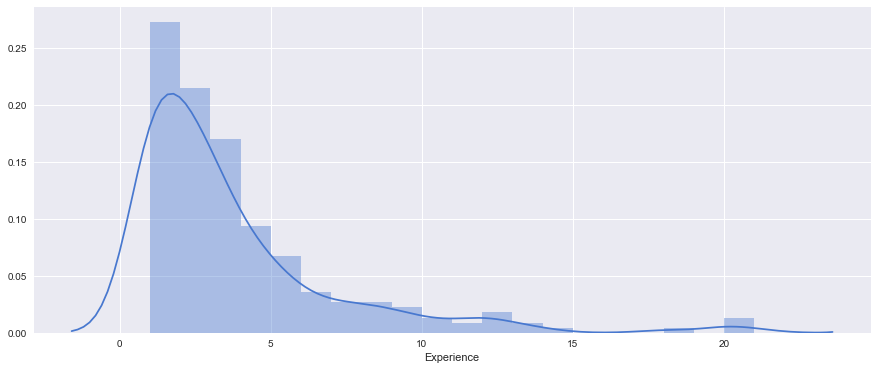

In [176]:
vis2 = sns.distplot(Jobseekers['Experience'], bins=20)

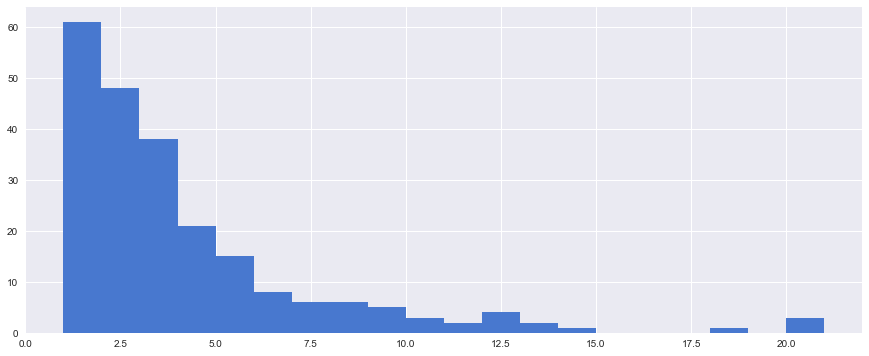

In [202]:
n2 = plt.hist(Jobseekers['Experience'], bins=20)

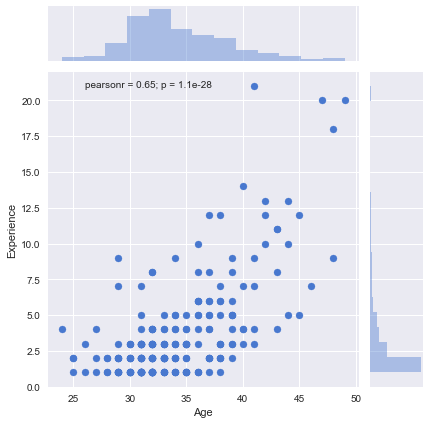

In [179]:
j = sns.jointplot(data=Jobseekers, x='Age',y='Experience')

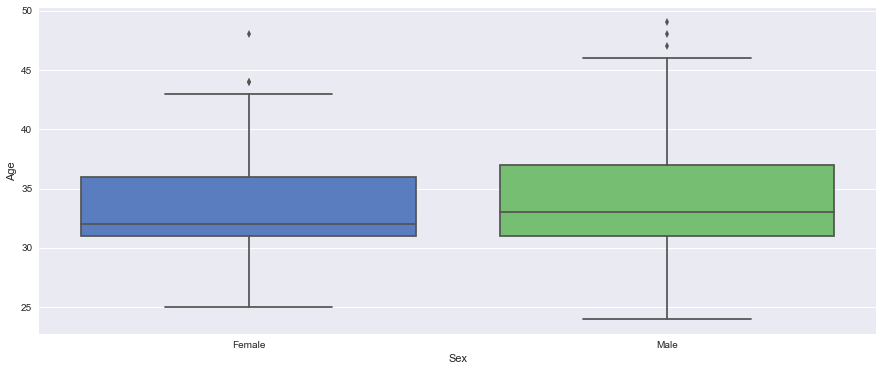

In [180]:
vis3 = sns.boxplot(data = Jobseekers, x='Sex', y='Age')

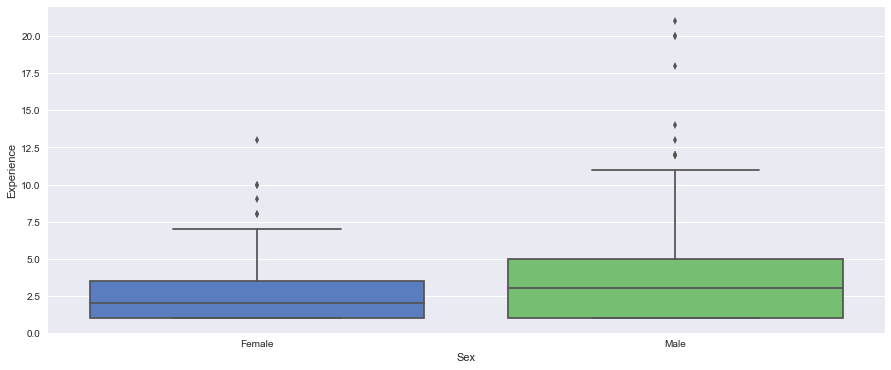

In [181]:
vis4 = sns.boxplot(data = Jobseekers, x='Sex', y='Experience')

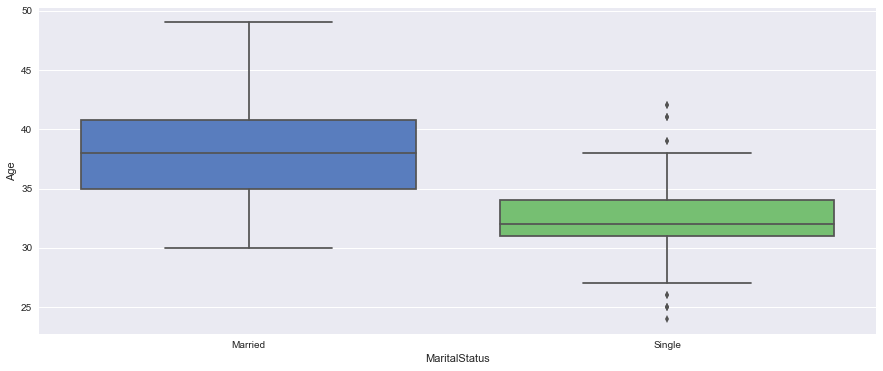

In [182]:
vis5 = sns.boxplot(data = Jobseekers, x='MaritalStatus', y='Age')

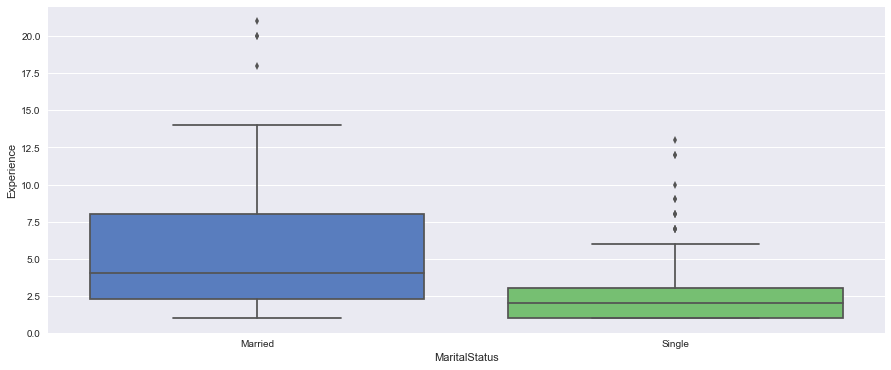

In [183]:
vis6 = sns.boxplot(data = Jobseekers, x='MaritalStatus', y='Experience')

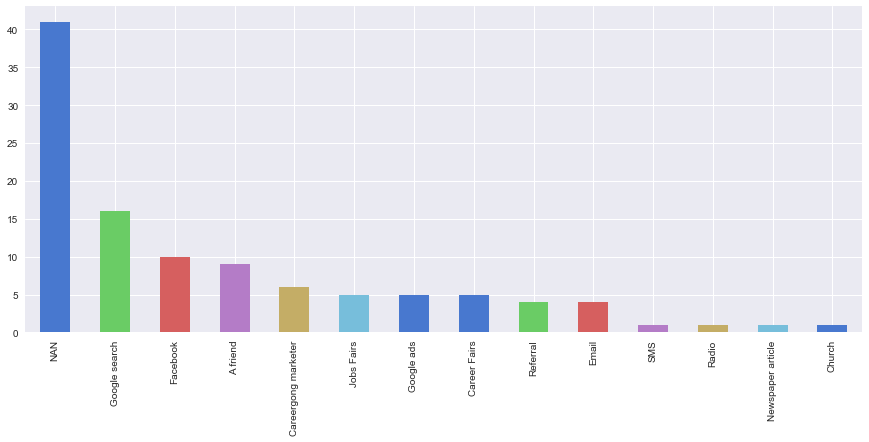

In [196]:
Jobseekers['advertmeans'].value_counts().plot(kind="bar")

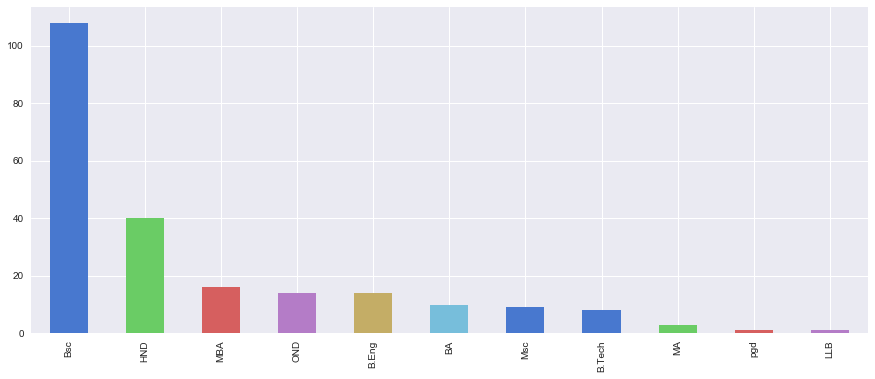

In [198]:
Jobseekers['Courselevel'].value_counts().plot(kind="bar")

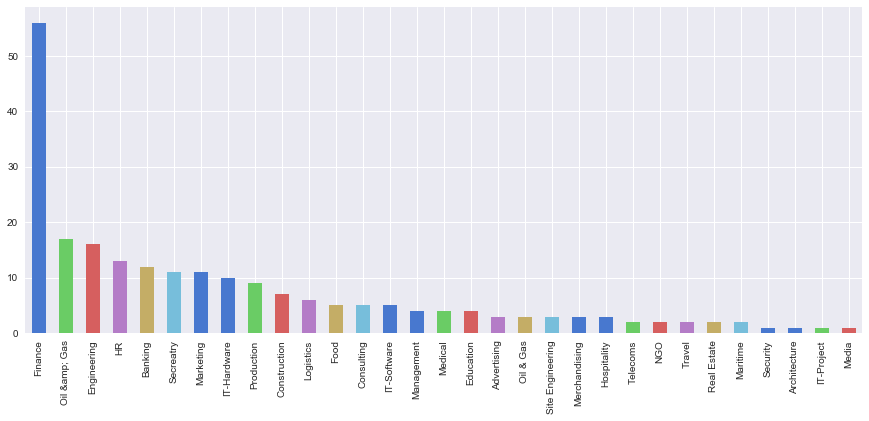

In [199]:
Jobseekers['Specialization'].value_counts().plot(kind="bar")

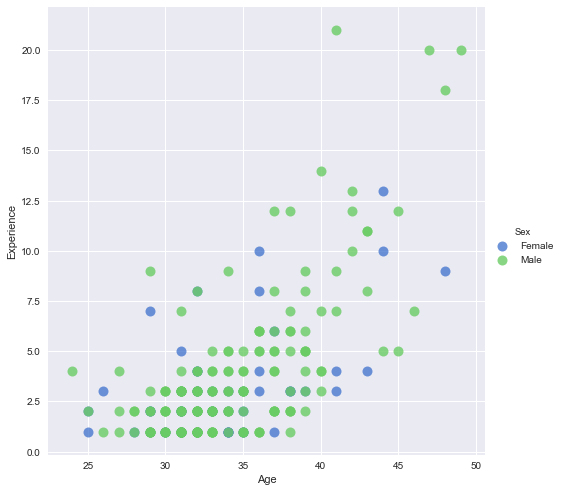

In [188]:
vis8 = sns.lmplot(data = Jobseekers, x='Age', y='Experience', fit_reg=False, hue='Sex', size=7, scatter_kws={'s':100})

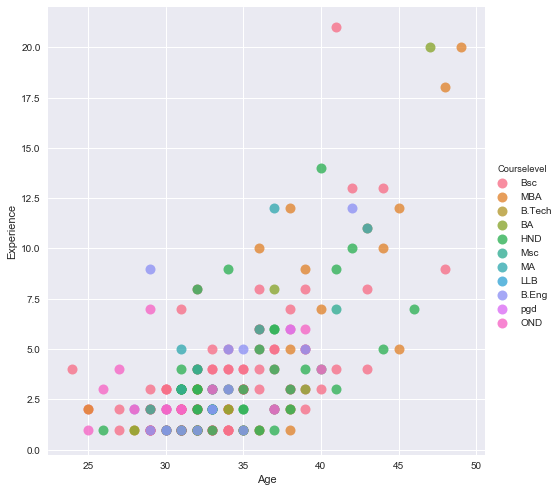

In [189]:
vis8 = sns.lmplot(data = Jobseekers, x='Age', y='Experience', fit_reg=False, hue='Courselevel', size=7, scatter_kws={'s':100})


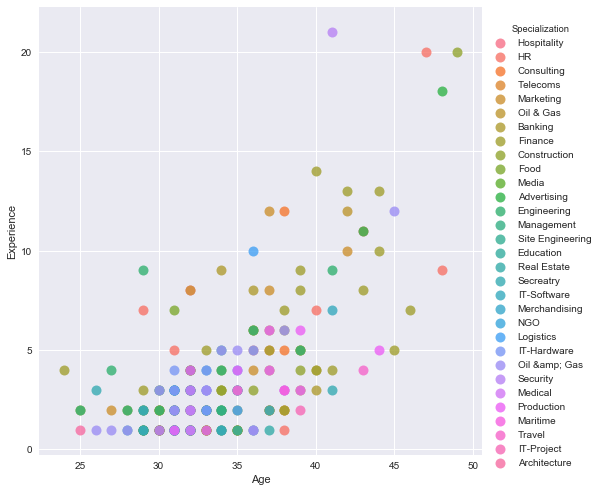

In [190]:
vis9 = sns.lmplot(data = Jobseekers, x='Age', y='Experience', fit_reg=False, hue='Specialization', size=7, scatter_kws={'s':100})


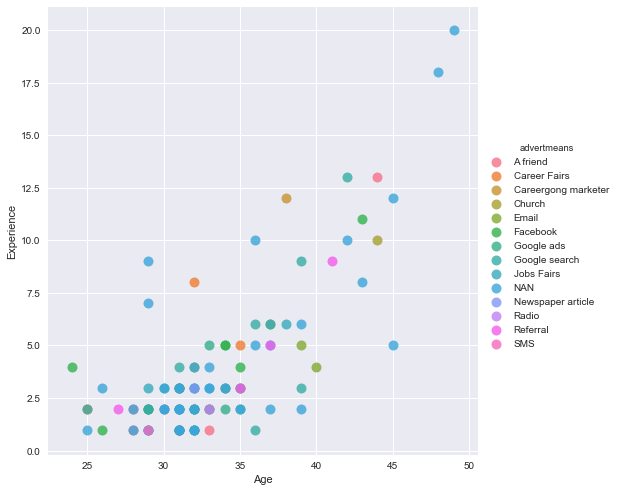

In [191]:
vis9 = sns.lmplot(data = Jobseekers, x='Age', y='Experience', fit_reg=False, hue='advertmeans', size=7, scatter_kws={'s':100})

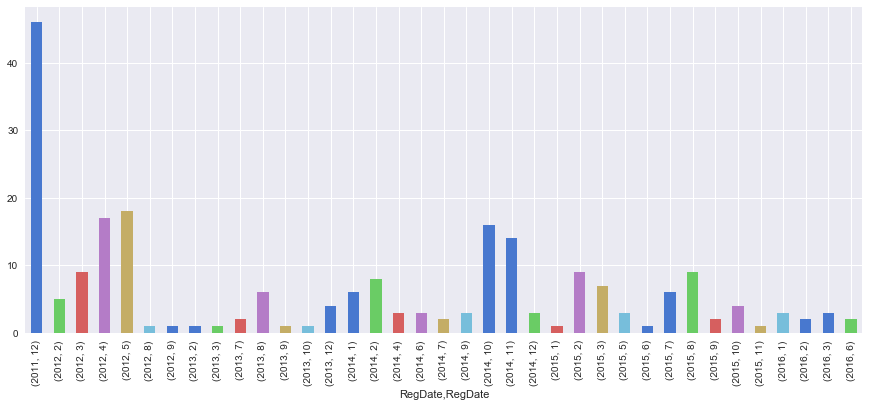

In [206]:
Jobseekers.RegDate.groupby([Jobseekers["RegDate"].dt.year, Jobseekers["RegDate"].dt.month]).count().plot(kind="bar")

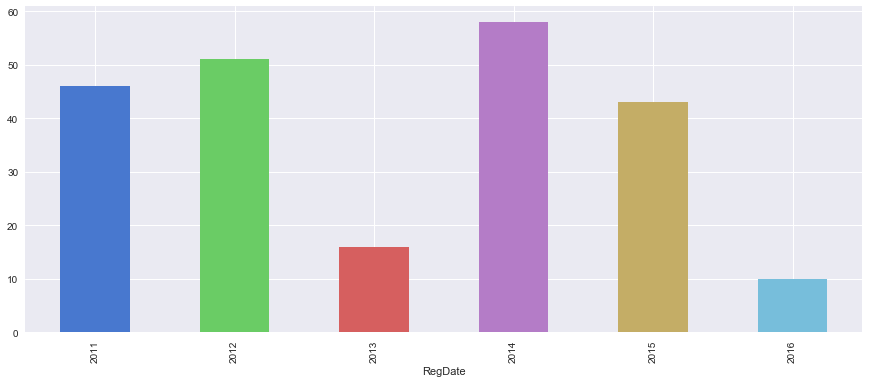

In [207]:
Jobseekers.RegDate.groupby([Jobseekers["RegDate"].dt.year]).count().plot(kind="bar")